Name: Mukundh J

----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

----------------------------------------------------------------------------------------------------------------------

Q)Mobile phone price fixed on the various factors like processor, RAM, Internal memory etc., There are 21 features given in the dataset. Classify the mobile price range as 0,1,2 or 3 based upon the features given in the dataset.

Class 0 – low cost

Class 1 – medium cost

Class 2 -  high cost

Class 3 – very high cost

Use SVM algorithm for classification.

----------------------------------------------------------------------------------------------------------------------

PREPROCESSING

In [5]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Id is extra in test dataset, it does not play any important role in prediction of price

In [7]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [9]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

<AxesSubplot:>

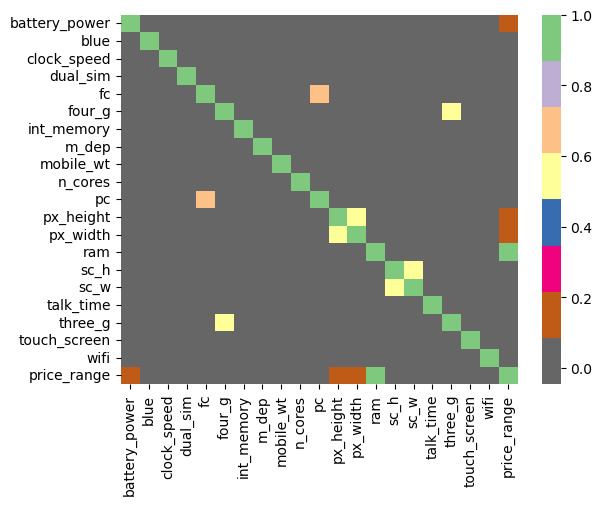

In [11]:
sns.heatmap(train.corr(),cmap="Accent_r")

<AxesSubplot:>

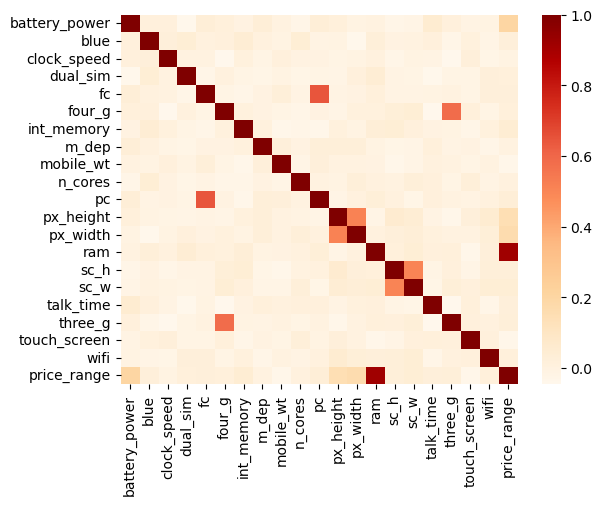

In [12]:
sns.heatmap(train.corr(),cmap="OrRd")

----------------------------------------------------------------------------------------------------------------------

From the above correlation plot we can observe that for classifying the price range, the best variables that determine the price range are ram,px_width,px_height,battery_power. Therefore the independent variables are ram,px_width,px_height,battery_power and the dependent variable which is required to be classified is price_range.

----------------------------------------------------------------------------------------------------------------------

In [13]:
x=train[['ram','px_width','px_height','battery_power']]

In [14]:
y=train.iloc[:,-1]

SPLITTING

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

SCALING

In [17]:
from sklearn.preprocessing import StandardScaler
stx=StandardScaler()
x_train=stx.fit_transform(x_train)
x_test=stx.fit_transform(x_test)

TRAINING

In [18]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

EVALUATION

In [19]:
y_pred=classifier.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95875

Therefore for the given test dataset, if it is fed to the model the following classes will be obtained

PREDICTION

In [21]:
x_test=test[['ram','px_width','px_height','battery_power']]
x_test

,ram,px_width,px_height,battery_power
0,3476,1412,226,1043
1,3895,857,746,841
2,2396,1366,1270,1807
3,3893,1752,295,1546
4,1773,810,749,1434
...,...,...,...,...
995,2121,913,644,1700
996,1933,1632,1152,609
997,1223,825,477,1185
998,2509,832,38,1533


In [22]:
x_test=stx.fit_transform(x_test)
x_test

array([[ 1.22937276,  0.39191165, -0.92699048, -0.47545131],
       [ 1.61464307, -0.87102753,  0.27472933, -0.94278218],
       [ 0.23631323,  0.28723561,  1.48569313,  1.29207729],
       ...,
       [-0.84225976, -0.94384565, -0.34692958, -0.1469316 ],
       [ 0.34021668, -0.92791669, -1.36145841,  0.65817305],
       [ 0.63353704, -1.43764349, -0.39314957,  0.04971753]])

In [23]:
y_pred=classifier.predict(x_test)

In [24]:
y_pred.size

1000

In [25]:
y_pred

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

----------------------------------------------------------------------------------------------------------------------

Now, Lets try considering all columns from imported dataset to be independent except for the last column

----------------------------------------------------------------------------------------------------------------------

In [26]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

In [28]:
stx=StandardScaler()
x_train=stx.fit_transform(x_train)
x_test=stx.fit_transform(x_test)

In [29]:
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
accuracy_score(y_test, y_pred2)

0.94875

Therefore a reduced accuracy is observed, however lets try predicting test data

In [30]:
x_testm=test.iloc[:,1:]
x_testm

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [31]:
x_test=stx.fit_transform(x_testm)
y_pred2=classifier.predict(x_test)

In [32]:
y_pred2

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [33]:
#x_testm['ypred']=y_pred
#x_testm['ypred2']=y_pred2
preds=(y_pred==y_pred2)

In [34]:
preds

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [35]:
np.count_nonzero(preds == False)

47

----------------------------------------------------------------------------------------------------------------------

It can be observed that there exists deviations from our first prediction. Since ypred2 takes more columns to consideration lets consider it optimal.

----------------------------------------------------------------------------------------------------------------------

RESULTS

In [36]:
test['prediction']=y_pred2
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,prediction
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


In [37]:
y_pred2=pd.DataFrame(y_pred2)

In [38]:
y_pred2.mask(y_pred2 == 3, "Very high cost", inplace=True)
y_pred2.mask(y_pred2 == 2, "High cost", inplace=True)
y_pred2.mask(y_pred2 == 1, "Medium cost", inplace=True)
y_pred2.mask(y_pred2 == 0, "Low cost", inplace=True)

In [39]:
y_pred2

,0
0,Very high cost
1,Very high cost
2,High cost
3,Very high cost
4,Medium cost
...,...
995,High cost
996,Medium cost
997,Low cost
998,High cost


In [40]:
test['Classification']=y_pred2

In [41]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,prediction,Classification
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,1412,3476,12,7,2,0,1,0,3,Very high cost
1,2,841,1,0.5,1,4,1,61,0.8,191,...,857,3895,6,0,7,1,0,0,3,Very high cost
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1366,2396,17,10,10,0,1,1,2,High cost
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,1752,3893,10,0,7,1,1,0,3,Very high cost
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,810,1773,15,8,7,1,0,1,1,Medium cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,913,2121,14,8,15,1,1,0,2,High cost
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1632,1933,8,1,19,0,1,1,1,Medium cost
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,825,1223,5,0,14,1,0,0,0,Low cost
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,832,2509,15,11,6,0,1,0,2,High cost


The test dataset is updated with the prediction class, and its corresponding classification (low,medium,high,very high)

----------------------------------------------------------------------------------------------------------------------